In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

## **Importing the Data**

In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Deep Learning Assignments/Assignment 8/Google_Stock_Price_Train.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# **Preprocessing the Data**

In [ ]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
# Checking for Outliers in 'High'
lower=df['High'].min()
upper=df['High'].max()
outliers = [x for x in df['High'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 0


In [ ]:
# Checking for outliers in 'Low'
lower=df['Low'].min()
upper=df['Low'].max()
outliers = [x for x in df['Low'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 0


In [ ]:
# Checking for Outliers in 'Close'
lower=df['Close'].min()
upper=df['Close'].max()
outliers = [x for x in df['Close'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 0


## **Splitting the Data in an 80:20 Ratio and Scaling**

In [ ]:
training_set = df.iloc[:1007, 1:2].values
test_set = df.iloc[1007:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1007):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
#Shape = (740, 60, 1) (values, time-step,label)

(947, 60, 1)


## **Creating the model**

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 11s 123ms/step - loss: 0.0337
Epoch 2/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0058
Epoch 3/100
30/30 [==============================] - 4s 122ms/step - loss: 0.0049
Epoch 4/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0047
Epoch 5/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0043
Epoch 6/100
30/30 [==============================] - 4s 122ms/step - loss: 0.0045
Epoch 7/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0044
Epoch 8/100
30/30 [==============================] - 4s 124ms/step - loss: 0.0044
Epoch 9/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0038
Epoch 10/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0036
Epoch 11/100
30/30 [==============================] - 5s 155ms/step - loss: 0.0035
Epoch 12/100
30/30 [==============================] - 5s 151ms/step - loss: 0.0040
Epoch 13/100

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:1007, 1:2]
dataset_test = df.iloc[1007:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(251, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 32ms/step


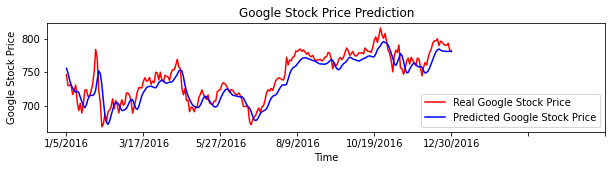

In [ ]:
# Visualising the results
plt.figure(figsize=(10,2))
plt.plot(df.loc[1007:, 'Date'],dataset_test.values, color = 'red', label = 'Real Google Stock Price')
plt.plot(df.loc[1007:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.xticks(np.arange(0,400,50))
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# **Changing the Step Size to 30**

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(30, 1007):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
#Shape = (740, 60, 1) (values, time-step,label)

(977, 30, 1)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
31/31 [==============================] - 9s 64ms/step - loss: 0.0315
Epoch 2/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0064
Epoch 3/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0050
Epoch 4/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0046
Epoch 5/100
31/31 [==============================] - 2s 67ms/step - loss: 0.0047
Epoch 6/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0054
Epoch 7/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0044
Epoch 8/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0051
Epoch 9/100
31/31 [==============================] - 2s 65ms/step - loss: 0.0044
Epoch 10/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0041
Epoch 11/100
31/31 [==============================] - 2s 65ms/step - loss: 0.0042
Epoch 12/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0035
Epoch 13/100
31/31 [=====

In [ ]:
dataset_test.shape

(251, 1)

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:1007, 1:2]
dataset_test = df.iloc[1007:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30,281):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# Shape of test data same format, but smaller sample (459, 60, 1)

(251, 30, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 0s 18ms/step


In [ ]:
predicted_stock_price .shape

(251, 1)

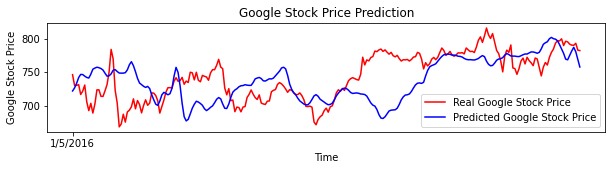

In [ ]:
# Visualising the results
plt.figure(figsize=(10,2))
plt.plot(df.loc[1007:, 'Date'],dataset_test.values, color = 'red', label = 'Real Google Stock Price')
plt.plot(df.loc[1007:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.xticks(np.arange(0,4,50))
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## **Changing the Step Size to 50**

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(50, 1007):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
#Shape = (740, 60, 1) (values, time-step,label)

(957, 50, 1)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 10s 103ms/step - loss: 0.0433
Epoch 2/100
30/30 [==============================] - 3s 102ms/step - loss: 0.0074
Epoch 3/100
30/30 [==============================] - 3s 102ms/step - loss: 0.0049
Epoch 4/100
30/30 [==============================] - 3s 102ms/step - loss: 0.0055
Epoch 5/100
30/30 [==============================] - 3s 100ms/step - loss: 0.0055
Epoch 6/100
30/30 [==============================] - 3s 100ms/step - loss: 0.0052
Epoch 7/100
30/30 [==============================] - 3s 100ms/step - loss: 0.0042
Epoch 8/100
30/30 [==============================] - 4s 127ms/step - loss: 0.0042
Epoch 9/100
30/30 [==============================] - 3s 102ms/step - loss: 0.0044
Epoch 10/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0038
Epoch 11/100
30/30 [==============================] - 3s 103ms/step - loss: 0.0041
Epoch 12/100
30/30 [==============================] - 3s 101ms/step - loss: 0.0039
Epoch 13/100

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:1007, 1:2]
dataset_test = df.iloc[1007:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(50,301):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# Shape of test data same format, but smaller sample (459, 60, 1)

(251, 50, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 27ms/step


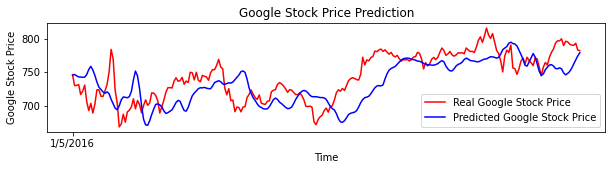

In [ ]:
# Visualising the results
plt.figure(figsize=(10,2))
plt.plot(df.loc[1007:, 'Date'],dataset_test.values, color = 'red', label = 'Real Google Stock Price')
plt.plot(df.loc[1007:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.xticks(np.arange(0,4,50))
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

It can be observed that the LSTM model does a good job predicting the stock prices when the step size used is 60, however as the step size decreases, the performance of the model also decreases with the step size=30 performing the worst. Since the model has been trained on a rather large chunk of data and the price of the stock does not see huge changes, the model is able to predict the prices well and with a good degree of accuracy.